In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display
from sklearn.impute import SimpleImputer
# from sklearn_pandas import CategoricalImputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
# Helper packages
from plotnine import *

# Modeling packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv('../data/ML.csv')

## ready for Pipeline

delete low varince

In [3]:
nzv = VarianceThreshold(threshold=0.1)

dealing with Skewness

In [4]:
yj = PowerTransformer(method="yeo-johnson")
# X_norm = ColumnTransformer([("norm", yj, selector(dtype_include="number"))])

Standardization

In [5]:
scaler = StandardScaler()

# standardize all numeric features
# std = ColumnTransformer([("norm", scaler, selector(dtype_include="number"))])

OneHotEncoder for advertiser_type

In [25]:
encoder = OneHotEncoder(handle_unknown="ignore")


pca to try if it going to help 

In [26]:
df.shape[1]

32

In [27]:
# pca = PCA(n_components=5)


In [28]:
preprocessor = ColumnTransformer(
  remainder="passthrough",
  transformers=[
  ("nzv_encode", nzv, selector(dtype_include="number")),
  ("norm", yj, selector(dtype_include="number")),
  ("std_encode", scaler, selector(dtype_include="number")),
  # ("pca_encode", pca, selector(dtype_include="number")),
  ("one-hot", encoder, selector(dtype_include="object")),
  ])

In [29]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('nzv_encode', VarianceThreshold(threshold=0.1),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225c8bd30>),
                                ('norm', PowerTransformer(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225c8be20>),
                                ('std_encode', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225d6db10>),
                                ('one-hot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225d6e590>)])

In [11]:
# df.shape

here i dropped DayOfRent bevouse isRent is dependent on DayOfRent so there is no meaning on adding it 

timeBeforeRent is also depedns on DayOfRent (dayOFrent - createDate)

for the id  when use it the accuracy increae ( becouse it is orderd)  as you can see 

In [30]:
temp = pd.read_csv('../data/aqar.csv')
temp[['id' , 'create_time'] ].sort_values(by='id')

,id,create_time
3866,211899,"['2016-05-26', '15:44:24']"
3830,779331,"['2017-11-23', '16:28:34']"
1703,825676,"['2017-12-30', '16:06:27']"
557,879567,"['2018-02-08', '19:20:10']"
533,1269068,"['2018-11-28', '16:02:25']"
...,...,...
491,4600178,"['2022-08-06', '12:05:24']"
1635,4600194,"['2022-08-06', '12:11:55']"
6710,4600222,"['2022-08-06', '12:21:15']"
26,4600237,"['2022-08-06', '12:24:50']"


we can see that the first id has the oldest creation date and the last id has the  date of my webscraping

but the reason of droping the value are they dont help my misk capstone project 

even though it increase the accuracy but what i want to build is depending about the apartment you have and the featurs of the apartment (the age , the bedrooms , the price you want ... etc ) and i can't ask the user what is your id 


In [15]:
X = df.drop(['isRent' , 'DayOfRent' , 'timeBeforeRent' ,  'id'] , axis=1)
y = df['isRent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# training & prediction


# logistic Regerssion

In [16]:
lr = LogisticRegression(max_iter=500)

model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("lr", lr),
])

In [17]:
model_pipeline.fit(X_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f82bc6a2080>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f82bc6a0d00>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f822fabe740>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f822fabe6e0>)])),
                ('lr', LogisticRegression(max_iter=500))])

In [18]:
model_pipeline.score(X_test , y_test)

0.6503368034292712

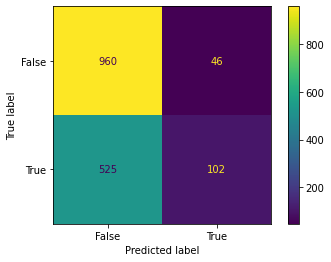

In [22]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=model_pipeline.classes_
  )
  
disp.plot()

In [ ]:
# # Helper packages
# import numpy as np
# import pandas as pd
# from plotnine import *
# from scipy.stats import uniform
# from scipy.stats import randint

# # Modeling packages
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from category_encoders.ordinal import OrdinalEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.compose import make_column_selector as selector
# from sklearn.compose import ColumnTransformer
# from sklearn.compose import make_column_selector as selector
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.inspection import partial_dependence
# from sklearn.pipeline import Pipeline

# Random Forest


In [34]:
rf_mod = RandomForestClassifier()

# create modeling pipeline
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("rf_mod", rf_mod),
])

In [35]:
model_pipeline.fit(X_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225c8bd30>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225c8be20>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225d6db10>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225d6e590>)])),
                ('rf_mod', RandomForestClassifier())])

In [36]:
model_pipeline.score(X_test , y_test)

0.8928352725045928

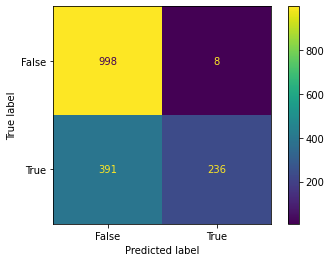

In [57]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=model_pipeline.classes_
  )
  
disp.plot()

In [39]:
print(classification_report(y_test,  model_pipeline.predict(X_test), target_names=["neg", "pos"]))

              precision    recall  f1-score   support

         neg       0.86      0.99      0.92      1006
         pos       0.97      0.74      0.84       627

    accuracy                           0.89      1633
   macro avg       0.92      0.86      0.88      1633
weighted avg       0.90      0.89      0.89      1633



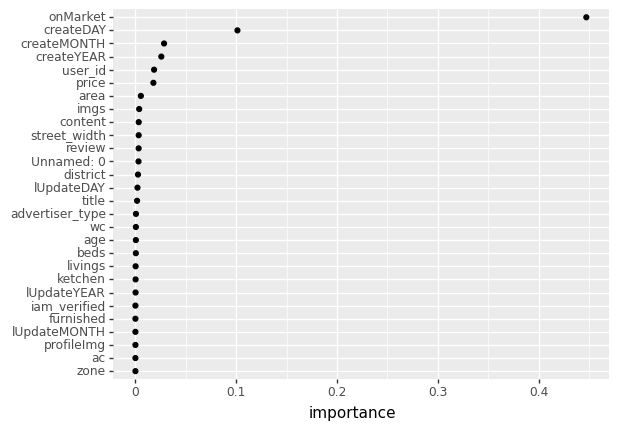

<ggplot: (8762319423380)>

In [40]:
r = permutation_importance(
  model_pipeline, 
  X_train, 
  y_train,
  n_repeats=30,
  random_state=0
  )
  
vip = pd.DataFrame({'feature': X_train.columns.values,
                    'importance': r.importances_mean})
                    
(ggplot(vip, aes('importance', 'reorder(feature, importance)'))
  + geom_point()
  + labs(y=None))

 # Decision Tree 

In [42]:
rf_mod = DecisionTreeClassifier()

In [43]:
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("rf_mod", rf_mod),
])

In [44]:
model_pipeline.fit(X_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225c8bd30>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225c8be20>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225d6db10>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225d6e590>)])),
                ('rf_mod', DecisionTreeClassifier())])

In [45]:
model_pipeline.score(X_test , y_test)

0.9142682180036742

In [46]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))

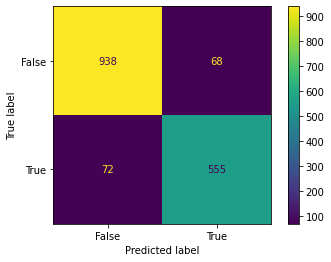

In [47]:
cm = confusion_matrix(y_test , model_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(
  confusion_matrix=cm,
  display_labels=model_pipeline.classes_
  )
  
disp.plot()

In [48]:
print(classification_report(y_test,  model_pipeline.predict(X_test), target_names=["neg", "pos"]))

              precision    recall  f1-score   support

         neg       0.93      0.93      0.93      1006
         pos       0.89      0.89      0.89       627

    accuracy                           0.91      1633
   macro avg       0.91      0.91      0.91      1633
weighted avg       0.91      0.91      0.91      1633



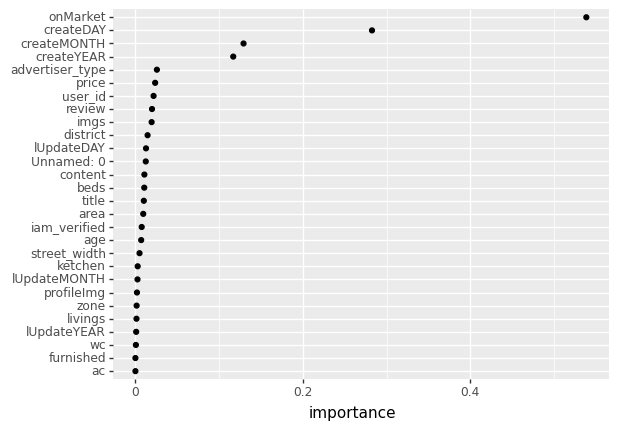

<ggplot: (8762309582638)>

In [49]:
r = permutation_importance(
  model_pipeline, 
  X_train, 
  y_train,
  n_repeats=30,
  random_state=0
  )
  
vip = pd.DataFrame({'feature': X_train.columns.values,
                    'importance': r.importances_mean})
                    
(ggplot(vip, aes('importance', 'reorder(feature, importance)'))
  + geom_point()
  + labs(y=None))

## Gini impurity

In [50]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [51]:
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("clf_gini", clf_gini),
])

In [52]:
model_pipeline.fit(X_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nzv_encode',
                                                  VarianceThreshold(threshold=0.1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225c8bd30>),
                                                 ('norm', PowerTransformer(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225c8be20>),
                                                 ('std_encode',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225d6db10>),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8225d6e590>)])),
                ('clf_gini',
                 DecisionTreeClassifier(max_depth=3, random_state=0))])

In [53]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

NameError: name 'y_pred_gini' is not defined

In [54]:
y_pred_train_gini = model_pipeline.predict(X_train)

y_pred_train_gini

array([False, False, False, ..., False, False, False])

In [55]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7523


In [56]:
print('Training set score: {:.4f}'.format(model_pipeline.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_pipeline.score(X_test, y_test)))

Training set score: 0.7523
Test set score: 0.7557
